In [1]:
from pysus.online_data import parquets_to_dataframe
from pysus.online_data import SINAN
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

## SINAN doenças existentes e anos disponiveis

In [2]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

In [3]:
SINAN.get_available_years('Animais Peçonhentos')

['2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

## Descobre qual região do Brasil tem mais registros de picadas por animais peçonhentos.


In [4]:
ap07, ap08, ap09, ap10, ap11 = SINAN.download('Animais Peçonhentos', [2007, 2008, 2009, 2010, 2011])

In [5]:
df1 = parquets_to_dataframe(ap07)

In [6]:
df2 = parquets_to_dataframe(ap08)

In [7]:
df3 = parquets_to_dataframe(ap09)

In [8]:
df4 = parquets_to_dataframe(ap10)

In [9]:
df5 = parquets_to_dataframe(ap11)

In [10]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)

In [11]:
df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2,X29,2007-03-15,200711,2007,43,430995,1611,2007-03-15,200711,...,2,,,,,2,1,,20070316,20070410
1,2,X29,2007-03-01,200709,2007,43,430995,1611,2007-02-25,200709,...,2,,,,,2,1,,20070302,20070327
2,2,X29,2007-03-16,200711,2007,52,521830,1784,2007-03-16,200711,...,,,,,,,1,,20070317,20070706
3,2,X29,2007-03-21,200712,2007,42,421710,1555,2007-03-21,200712,...,2,,,,,1,1,,20070504,20070327
4,2,X29,2007-03-14,200711,2007,26,260920,1498,2007-03-14,200711,...,,,,,,,,,,20070409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137933,2,X29,2011-05-21,201120,2011,31,317010,1461,2011-05-21,201120,...,2,,,,,2,1,,20110525,
137934,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,9,1,,20110803,20110408
137935,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,9,1,,20110803,20110408
137936,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,201121,...,2,,,,,2,1,,20110806,20110808


In [12]:

#objetivo: criar uma coluna com o numero de picadas para usar com o id_regiao
df = df.rename_axis('index_').reset_index()
df

,index_,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,0,2,X29,2007-03-15,200711,2007,43,430995,1611,2007-03-15,...,2,,,,,2,1,,20070316,20070410
1,1,2,X29,2007-03-01,200709,2007,43,430995,1611,2007-02-25,...,2,,,,,2,1,,20070302,20070327
2,2,2,X29,2007-03-16,200711,2007,52,521830,1784,2007-03-16,...,,,,,,,1,,20070317,20070706
3,3,2,X29,2007-03-21,200712,2007,42,421710,1555,2007-03-21,...,2,,,,,1,1,,20070504,20070327
4,4,2,X29,2007-03-14,200711,2007,26,260920,1498,2007-03-14,...,,,,,,,,,,20070409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596361,137933,2,X29,2011-05-21,201120,2011,31,317010,1461,2011-05-21,...,2,,,,,2,1,,20110525,
596362,137934,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,9,1,,20110803,20110408
596363,137935,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,9,1,,20110803,20110408
596364,137936,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,,,,,2,1,,20110806,20110808


In [13]:
df = df.replace('', 'unknown')

In [14]:
df

,index_,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,0,2,X29,2007-03-15,200711,2007,43,430995,1611,2007-03-15,...,2,unknown,unknown,unknown,unknown,2,1,unknown,20070316,20070410
1,1,2,X29,2007-03-01,200709,2007,43,430995,1611,2007-02-25,...,2,unknown,unknown,unknown,unknown,2,1,unknown,20070302,20070327
2,2,2,X29,2007-03-16,200711,2007,52,521830,1784,2007-03-16,...,unknown,unknown,unknown,unknown,unknown,unknown,1,unknown,20070317,20070706
3,3,2,X29,2007-03-21,200712,2007,42,421710,1555,2007-03-21,...,2,unknown,unknown,unknown,unknown,1,1,unknown,20070504,20070327
4,4,2,X29,2007-03-14,200711,2007,26,260920,1498,2007-03-14,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,20070409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596361,137933,2,X29,2011-05-21,201120,2011,31,317010,1461,2011-05-21,...,2,unknown,unknown,unknown,unknown,2,1,unknown,20110525,unknown
596362,137934,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,unknown,unknown,unknown,unknown,9,1,unknown,20110803,20110408
596363,137935,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,unknown,unknown,unknown,unknown,9,1,unknown,20110803,20110408
596364,137936,2,X29,2011-05-22,201121,2011,24,240810,1416,2011-05-22,...,2,unknown,unknown,unknown,unknown,2,1,unknown,20110806,20110808


In [15]:
df_clone=df[:]
df_final=df_clone[['SG_UF_NOT','index_']]
df_final

,SG_UF_NOT,index_
0,43,0
1,43,1
2,52,2
3,42,3
4,26,4
...,...,...
596361,31,137933
596362,24,137934
596363,24,137935
596364,24,137936


In [16]:
registros_por_regiao = df['SG_UF_NOT'].value_counts()
registros_por_regiao = registros_por_regiao.sort_values(ascending=False)
registros_por_regiao

31         97488
41         71167
35         70491
29         61345
42         41198
26         36916
15         34813
27         26033
43         21295
24         15258
32         15049
52         11253
25         10756
23         10395
51         10184
13          9999
21          9551
17          8854
50          5787
33          5585
22          4480
28          4327
11          3451
12          3321
53          2824
16          2468
14          2077
unknown        1
Name: SG_UF_NOT, dtype: Int64

## Plotando o grafico barra Absoluto


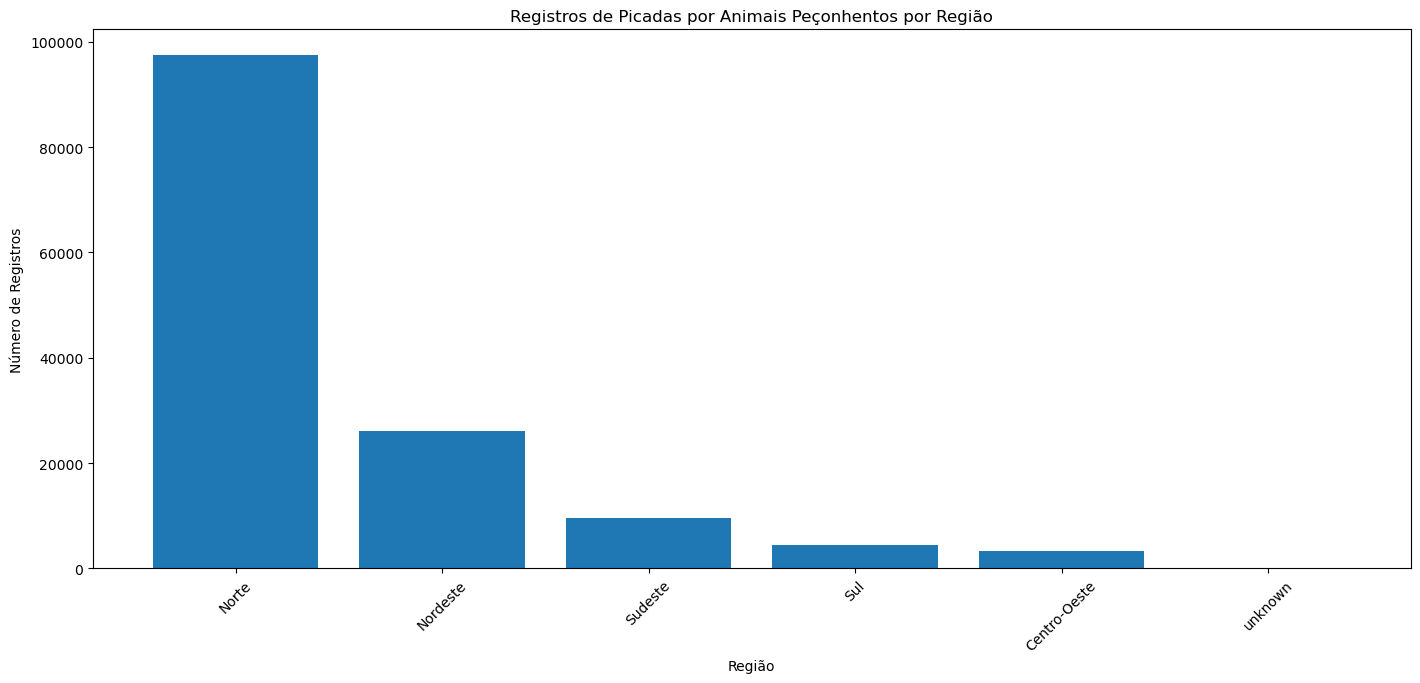

In [32]:
mapeamento_uf_regiao = {
    '11': 'Norte',
    '12': 'Norte',
    '13': 'Norte',
    '14': 'Norte',
    '15': 'Norte',
    '16': 'Norte',
    '17': 'Norte',
    '21': 'Nordeste',
    '22': 'Nordeste',
    '23': 'Nordeste',
    '24': 'Nordeste',
    '25': 'Nordeste',
    '26': 'Nordeste',
    '27': 'Nordeste',
    '28': 'Nordeste',
    '29': 'Nordeste',
    '31': 'Sudeste',
    '32': 'Sudeste',
    '33': 'Sudeste',
    '35': 'Sudeste',
    '41': 'Sul',
    '42': 'Sul',
    '43': 'Sul',
    '50': 'Centro-Oeste',
    '51': 'Centro-Oeste',
    '52': 'Centro-Oeste',
    '53': 'Centro-Oeste',
    'unknown': 'unknown'
}

nomes_regiao = list(mapeamento_uf_regiao.values())

# nomes_regiao.pop() # Remover o último elemento da lista

fig, ax = plt.subplots(figsize=(17, 7))
plt.bar(nomes_regiao, registros_por_regiao)
plt.title('Registros de Picadas por Animais Peçonhentos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Registros')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()


## Plotando Grafico em barra Relativo

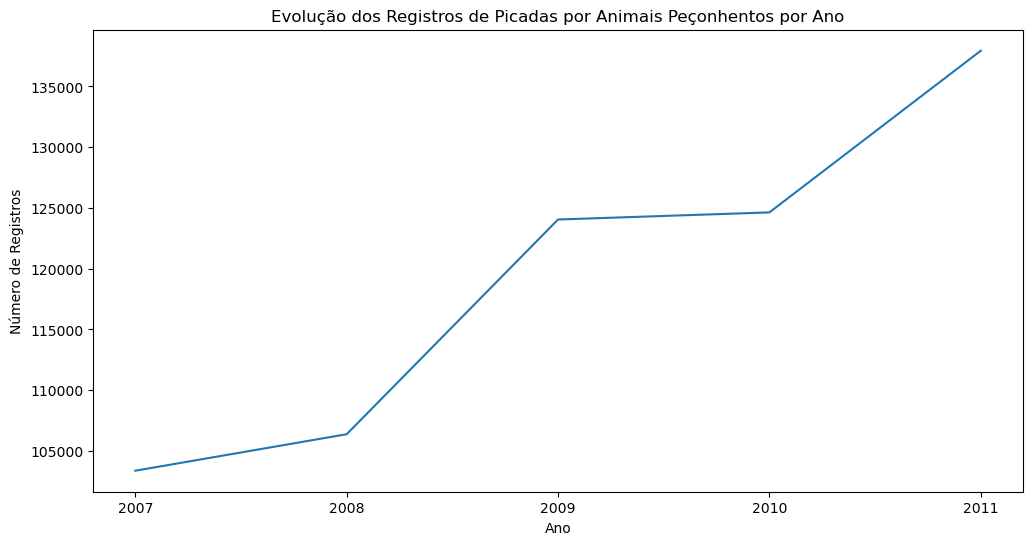

In [40]:
# Certifique-se de que a coluna 'DT_NOTIFIC' esteja em formato de data adequado
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

# Extrair o ano inteiro da coluna 'DT_NOTIFIC'
df['Ano'] = df['DT_NOTIFIC'].dt.year

# Converter os valores da coluna 'Ano' em números inteiros
df['Ano'] = df['Ano'].astype(int)

# Calcular o número de ocorrências por ano
registros_por_ano = df['Ano'].value_counts().sort_index()

# Plotar o gráfico de visualização temporal
fig, ax = plt.subplots(figsize=(12, 6))
registros_por_ano.plot(kind='line', ax=ax)

ax.set_title('Evolução dos Registros de Picadas por Animais Peçonhentos por Ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de Registros')

# Definir os locais dos ticks do eixo x
plt.xticks(registros_por_ano.index)

plt.show()

## Plotando o grafico de mapa

/home/rafa_hp/miniconda/envs/cpa/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
/home/rafa_hp/miniconda/envs/cpa/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/rafa_hp/miniconda/envs/cpa/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


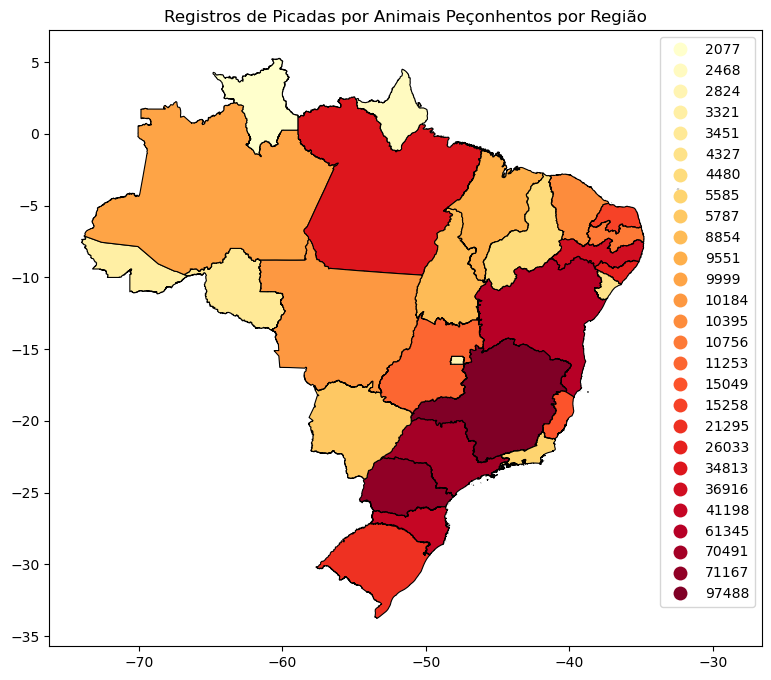

In [34]:
# Carregar o shapefile com os dados geográficos das regiões do Brasil, Caminho absoluto para o shapefile
shapefile_path = '/home/rafa_hp/T3_CPAD/BR_UF_2021/BR_UF_2021.shx'

# Diretório de referência (diretório atual ou outro diretório base)
diretorio_referencia = '/home/rafa_hp/T3_CPAD' 

# Criar o caminho relativo
caminho_relativo = os.path.relpath(shapefile_path, diretorio_referencia)

mapa = gpd.read_file(caminho_relativo)

# Contagem de registros por região
registros_por_regiao = df['SG_UF_NOT'].value_counts()
registros_por_regiao = registros_por_regiao.sort_values(ascending=False)

# Juntar os dados geográficos com os dados de registros por região
mapa_regioes = mapa.merge(registros_por_regiao, left_on='CD_UF', right_index=True, how='left')

# Plotar o mapa
fig, ax = plt.subplots(figsize=(12, 8))
mapa_regioes.plot(column='SG_UF_NOT', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='k', legend=True)
ax.set_title('Registros de Picadas por Animais Peçonhentos por Região')
plt.show()